In [1]:
import os
from matplotlib.pyplot import imshow
import scipy.io
import scipy.misc
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from keras import backend as K
from keras.models import load_model

# The below functions from the yad2k library will be used
from yad2k.models.keras_yolo import yolo_head, yolo_eval

%matplotlib inline

Using TensorFlow backend.


In [2]:
# The below provided fucntions will be used from yolo_utils.py
from yolo_utils import read_classes, read_anchors, generate_colors, preprocess_image, draw_boxes

In [3]:
#Loading the classes and the anchor boxes that are provided in the model_data folder
class_names = read_classes("coco_classes.txt")
anchors = read_anchors("yolo_anchors.txt")

#Load the pretrained model. Please refer the README file to get info on how to obtain the yolo.h5 file
yolo_model = load_model("yolo.h5")

#Print the summery of the model
yolo_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 608, 608, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 608, 608, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 608, 608, 32) 128         conv2d_1[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 608, 608, 32) 0           batch_normalization_1[0][0]      
_____________________________________

/home/suraj/Softwares-and-tools/Anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [4]:
input_image_name = "../pics/bag1.jpg"

#Obtaining the dimensions of the input image
input_image = Image.open(input_image_name)
width, height = input_image.size
width = np.array(width, dtype=float)
height = np.array(height, dtype=float)

#Assign the shape of the input image to image_shapr variable
image_shape = (height, width)


#Preprocess the input image before feeding into the convolutional network
image, image_data = preprocess_image(input_image_name, model_image_size = (608, 608))


#Convert final layer features to bounding box parameters
yolo_outputs = yolo_head(yolo_model.output, anchors, len(class_names))

#Now yolo_eval function selects the best boxes using filtering and non-max suppression techniques.
# If you want to dive in more to see how this works, refer keras_yolo.py file in yad2k/models
boxes, scores, classes = yolo_eval(yolo_outputs, image_shape)

In [5]:
# Initiate a session
sess = K.get_session()

#Run the session
out_scores, out_boxes, out_classes = sess.run([scores, boxes, classes],feed_dict={yolo_model.input:image_data,K.learning_phase(): 0})

Found 1 boxes for ../pics/bag1.jpg
person 0.69 (133, 1040) (1350, 2691)


/home/suraj/Softwares-and-tools/Anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


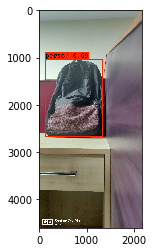

In [6]:
#Print the results
print('Found {} boxes for {}'.format(len(out_boxes), input_image_name))
#Produce the colors for the bounding boxs
colors = generate_colors(class_names)
#Draw the bounding boxes
draw_boxes(image, out_scores, out_boxes, out_classes, class_names, colors)
#Apply the predicted bounding boxes to the image and save it
image.save(os.path.join(input_image_name), quality=90)
output_image = scipy.misc.imread(os.path.join(input_image_name))
plt.imshow(output_image)

In [13]:
print(out_scores,out_boxes)

[0.86303073] [[ -78.354126   43.86703  2073.016    1820.1439  ]]
